In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collecting

In [3]:
def load_dataset():
    file = ("2023.csv")
    df = pd.read_csv(file)
    return df

load_dataset()

,Google Cloud Region,Location,Google CFE,Grid carbon intensity (gCO2eq / kWh)
0,africa-south1,Johannesburg,0.16,646
1,asia-east1,Taiwan,0.18,451
2,asia-east2,Hong Kong,0.28,360
3,asia-northeast1,Tokyo,0.16,459
4,asia-northeast2,Osaka,0.30,385
5,asia-northeast3,Seoul,0.35,378
6,asia-south1,Mumbai,0.14,648
7,asia-south2,Delhi,0.29,529
8,asia-southeast1,Singapore,0.04,369
9,asia-southeast2,Jakarta,0.13,580


In [4]:
def print_summarize_dataset(df):
    print("Data Types:")
    print(df.dtypes)
    print()
    print("Statistical summary:")
    display(df.describe())
    
df = load_dataset()
print_summarize_dataset(df)

Data Types:
Google Cloud Region                      object
Location                                 object
Google CFE                              float64
Grid carbon intensity (gCO2eq / kWh)      int64
dtype: object

Statistical summary:


,Google CFE,Grid carbon intensity (gCO2eq / kWh)
count,40.00000,40.000000
mean,0.51975,337.375000
std,0.33407,200.206008
min,0.00000,2.000000
25%,0.27500,137.500000
50%,0.52000,352.500000
75%,0.87750,472.500000
max,1.00000,723.000000


# Data Exploration

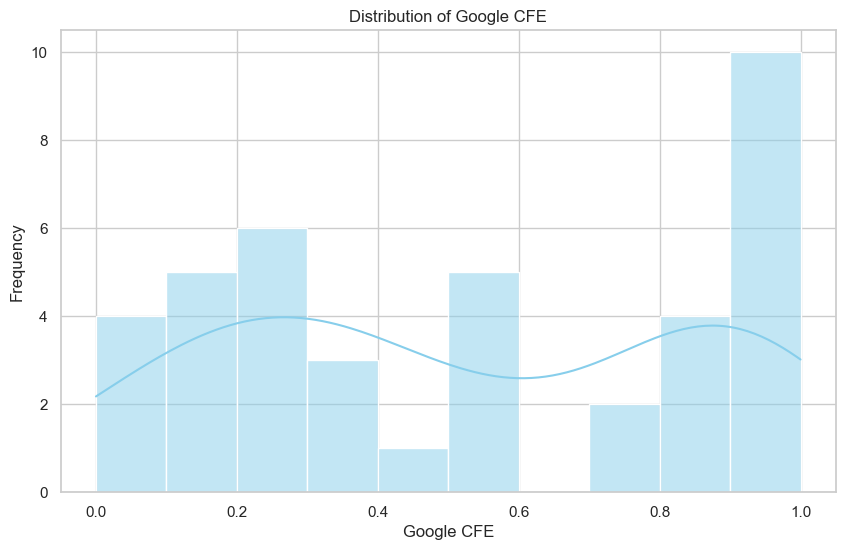

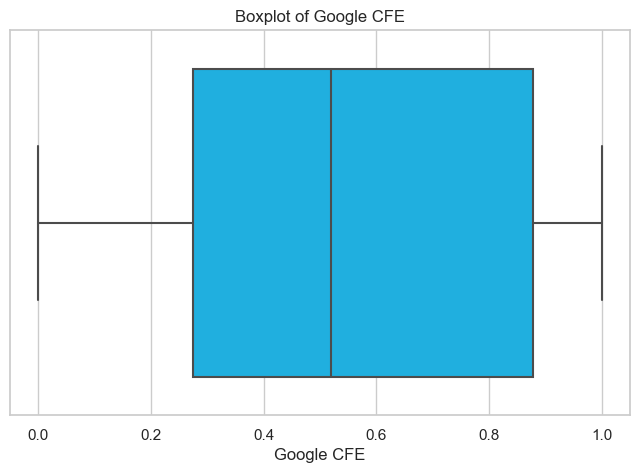

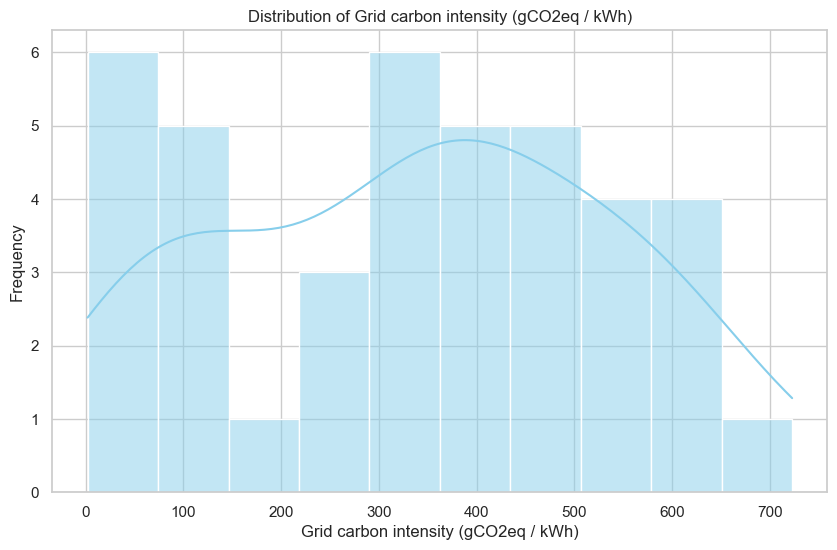

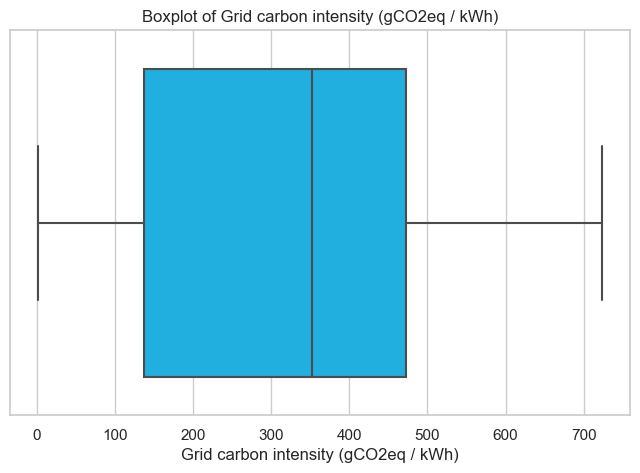

In [5]:
def print_histograms(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    sns.set(style="whitegrid", palette="pastel")
    
    for column in columns:
        #Histograms
        plt.figure(figsize=(10,6))
        sns.histplot(df[column], kde=True, color='skyblue', bins=10)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
        
        #Boxplot
        plt.figure(figsize=(8,5))
        sns.boxplot(x=df[column], color='deepskyblue')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()
        
print_histograms(df)

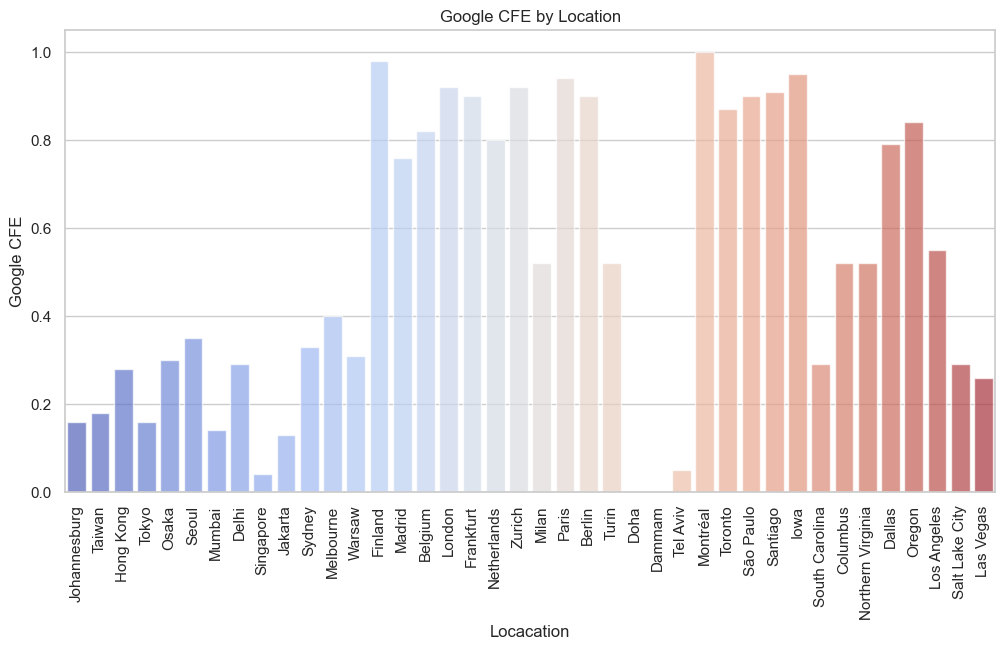

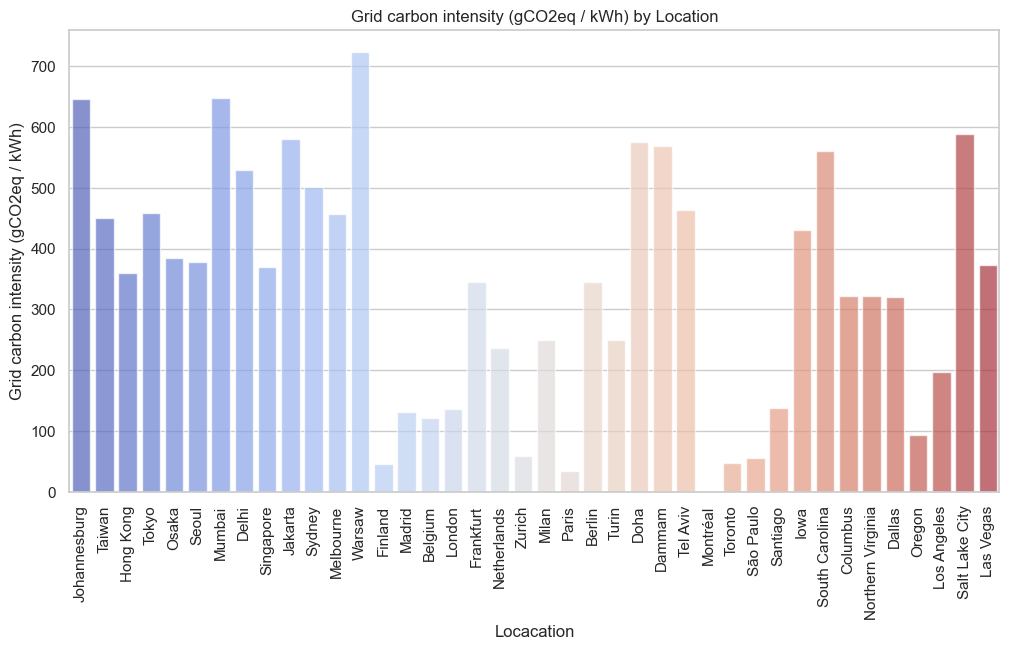

In [6]:
def bar_chart(df):
    df = df.dropna(subset=['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)'])
    
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    
    for column in columns:
        plt.figure(figsize=(12,6))
        sns.barplot(x='Location', y=column, data=df, palette='coolwarm', alpha=0.7)
        plt.xticks(rotation=90)
        plt.title(f'{column} by Location')
        plt.xlabel('Locacation')
        plt.ylabel(column)
        plt.show()

bar_chart(df)

In [7]:
import folium
from folium.plugins import HeatMap

In [8]:
# Define a function to create a geographic heat map
def geographic_heat_map(df):
    # Dictionary of approximate coordinates for each Google Cloud region
    coordinates = {
        'asia-east1': (25.0330, 121.5654),  # Taiwan
        'asia-east2': (22.3193, 114.1694),  # Hong Kong
        'asia-northeast1': (35.6895, 139.6917),  # Tokyo
        'asia-northeast2': (34.6937, 135.5023),  # Osaka
        'asia-northeast3': (37.5665, 126.9780),  # Seoul
        'asia-south1': (19.0760, 72.8777),  # Mumbai
        'asia-southeast1': (1.3521, 103.8198),  # Singapore
        'asia-southeast2': (-6.2088, 106.8456),  # Jakarta
        'australia-southeast1': (-33.8688, 151.2093),  # Sydney
        'europe-north1': (60.1699, 24.9384),  # Finland
        'europe-west1': (50.8503, 4.3517),  # Belgium
        'europe-west2': (51.5074, -0.1278),  # London
        'europe-west3': (50.1109, 8.6821),  # Frankfurt
        'europe-west4': (52.3676, 4.9041),  # Netherlands
        'europe-west6': (47.3769, 8.5417),  # Zurich
        'northamerica-northeast1': (45.5017, -73.5673),  # Montreal
        'southamerica-east1': (-23.5505, -46.6333),  # Sao Paulo
        'us-central1': (41.8780, -93.0977),  # Iowa
        'us-east1': (33.8361, -81.1637),  # South Carolina
        'us-east4': (39.0438, -77.4874),  # Northern Virginia
        'us-west1': (45.5234, -122.6762),  # Oregon
        'us-west2': (34.0522, -118.2437),  # Los Angeles
        'us-west3': (40.7608, -111.8910),  # Salt Lake City
        'us-west4': (36.1699, -115.1398)   # Las Vegas
    }
    
    # Create a pandas DataFrame with the added coordinates
    df['Coordinates'] = df['Google Cloud Region'].map(coordinates)
    
    # Create a basemap centered on mean coordinates
    map_center = [20, 0] # Approximate center of the map
    m = folium.Map(location=map_center, zoom_start=2)
    
    # Create a list of data for the heat map
    heat_data = [[row['Coordinates'][0], row['Coordinates'][1], row['Grid carbon intensity (gCO2eq / kWh)']] 
                 for index, row in df.dropna(subset=['Coordinates', 'Grid carbon intensity (gCO2eq / kWh)']).iterrows()]
    
    # Add the HeatMap to the map
    HeatMap(heat_data, radius=15).add_to(m)
    
    return m

geographic_map = geographic_heat_map(df)
geographic_map.save("geographic_heat_map_2023.html") # Save the map as HTML file

In [9]:
def compute_correlations_matrix(df):
    columns = ['Google CFE', 'Grid carbon intensity (gCO2eq / kWh)']
    correlations = df[columns].corr(method='pearson')
    return correlations

compute_correlations_matrix(df)

,Google CFE,Grid carbon intensity (gCO2eq / kWh)
Google CFE,1.000000,-0.812653
Grid carbon intensity (gCO2eq / kWh),-0.812653,1.000000


##### Conclusión
##### El aumento de la correlación negativa a -0.812653 en 2023 indica que, a nivel global, hay una relación más fuerte entre el uso de energía libre de carbono y la reducción de la intensidad de carbono de la red en comparación con el año anterior. Esto es un resultado positivo que refuerza la necesidad de continuar e intensificar las estrategias para fomentar la energía limpia y reducir las emisiones de carbono en la red energética.

##### Este cambio también puede implicar la necesidad de monitorear y analizar más a fondo qué factores específicos han contribuido a este aumento en la correlación y cómo pueden aplicarse de manera más efectiva en todas las regiones.